In [2]:
import pandas as pd

train_data = pd.read_csv('D:/python_code/work2/data_12.26_final_used/touch_train(273835).csv')
test_data = pd.read_csv('D:/python_code/work2/data_12.26_final_used/touch_test(117358).csv')
validation_data = pd.read_csv('D:/python_code/work2/data_12.26_final_used/touch_validation(90864).csv')

y_train = train_data['Multi']
x_train = train_data.iloc[:, 4:]

y_test = test_data['Multi']
x_test = test_data.iloc[:, 4:]

y_validation = validation_data['Multi']
x_validation = validation_data.iloc[:, 4:]

x_train.columns = x_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
x_test.columns = x_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

In [3]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

lgb_model = lgb.LGBMRegressor(force_row_wise=True) #importance_type='gain'

param_grid = {
    'n_estimators': [700],
    'learning_rate': [0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31],
    'min_child_samples': [10, 20],
}

grid_search = GridSearchCV(estimator=lgb_model, 
                           param_grid=param_grid, 
                           cv=5,
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

"""grid_search.fit(x_train, y_train, 
                eval_set=[(x_test, y_test)], 
                eval_metric='rmse',
                callbacks=[lgb.early_stopping(stopping_rounds=10)])"""

print(f"Best Parameters: {grid_search.best_params_}")

model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Total Bins 2939
[LightGBM] [Info] Number of data points in the train set: 273835, number of used features: 85
[LightGBM] [Info] Start training from score 1.095134
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 700, 'num_leaves': 31}


In [1]:
import pickle

pkl_filename = "D:/python_code/work2/model/lgbm_gain_model_with85f(273835_r29).pkl"

with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [3]:
import numpy as np

prediction_trian = model.predict(x_train)
trian_r2 = model.score(x_train, y_train)
RMSE = np.sqrt(np.mean((y_train - prediction_trian) ** 2))
print('trian r2:', trian_r2)
print('trian RMSE:', RMSE)

trian r2: 0.21965164962092731
trian RMSE: 1.1054617243898428


In [4]:
prediction_test = model.predict(x_test)
test_r2 = model.score(x_test, y_test)
RMSE = np.sqrt(np.mean((y_test - prediction_test) ** 2))
print('test r2:', test_r2)
print('test RMSE:', RMSE)

test r2: 0.20346257288441105
test RMSE: 1.1194175455668482


In [5]:
prediction_validation = model.predict(x_validation)
validation_r2 = model.score(x_validation, y_validation)
RMSE = np.sqrt(np.mean((y_validation - prediction_validation) ** 2))
print('validation r2:', validation_r2)
print('validation RMSE:', RMSE)

validation r2: 0.18238659980512628
validation RMSE: 1.1320177005195753


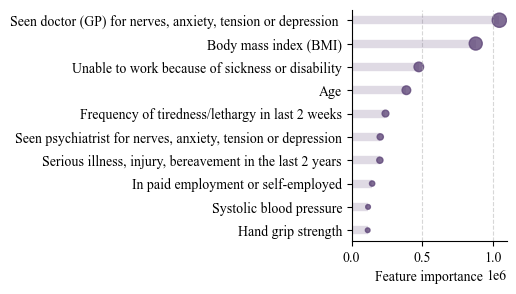

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10

validation_data = pd.read_csv('D:/python_code/work2/data_12.26/touch_validation(90864).csv')
x = validation_data.iloc[:, 4:]
#x.columns = x.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_labels = x.columns
coefficients = model.feature_importances_

sorted_indices = coefficients.argsort()[::-1]
sorted_labels = [X_labels[i] for i in sorted_indices]
sorted_coefficients = [coefficients[i] for i in sorted_indices]

top_coefficients = sorted_coefficients[:10][::-1]
top_labels = sorted_labels[:10][::-1]

bubble_sizes = [0.0001 * np.abs(coeff) for coeff in top_coefficients]

plt.figure(figsize=(2, 3))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.hlines(y=np.arange(len(top_labels)), xmin=0, xmax=top_coefficients, color='#60487A', alpha=0.2, linewidth=6)
plt.scatter(top_coefficients, np.arange(len(top_labels)), color='#60487A', s=bubble_sizes, alpha=0.8)

plt.yticks(np.arange(len(top_labels)), top_labels, rotation=0, ha='right')  
plt.xticks(fontsize=10)
plt.xlabel('Feature importance')
#plt.title('LGBM')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlim(0,)

plt.savefig("D:/python_code/work2/Figure/Weight plot(gain).svg", bbox_inches='tight', dpi=400, transparent=True)

plt.show()